**1**.**ANN** **Implementation**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

a)**Load** **and** **preprocess** **the** **MNIST** **dataset**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**b)Define the architecture**

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model

<Sequential name=sequential, built=True>

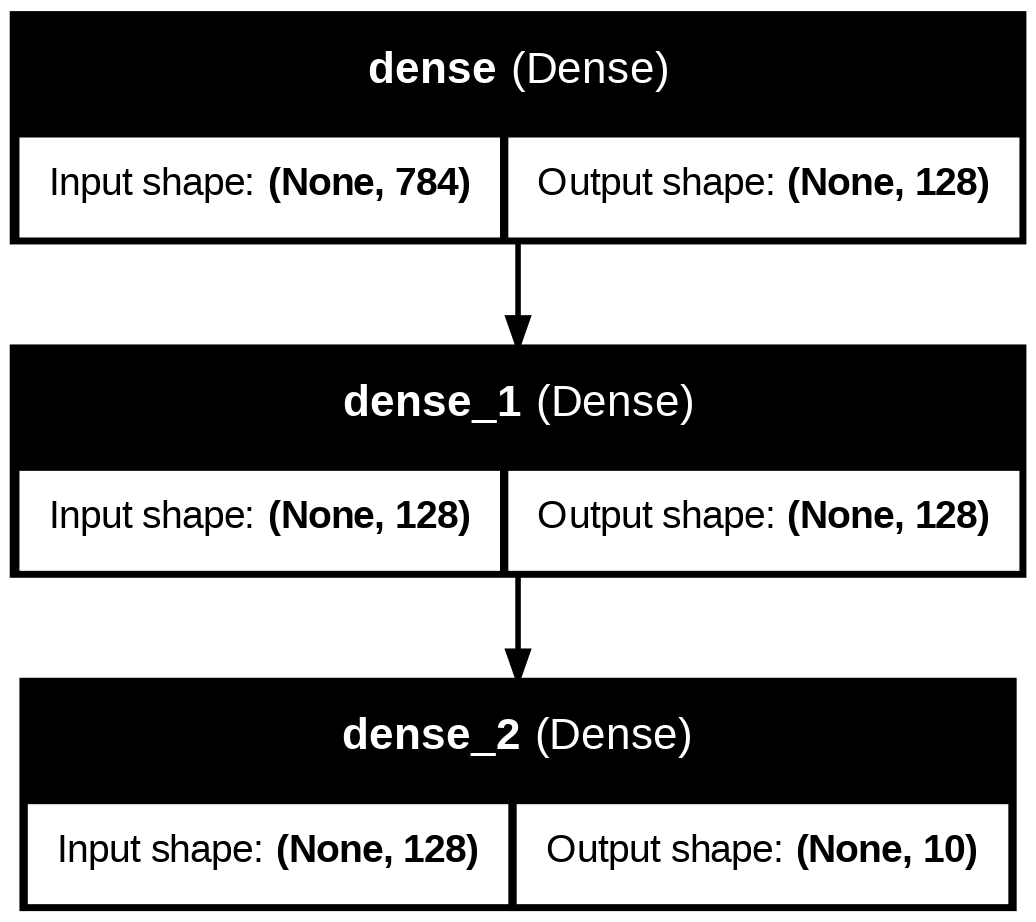

In [7]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**c)Compile The Model**

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# 1
import os
import datetime
#2
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs/20241019-120534


**d)Train The Model**

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8802 - loss: 0.4108 - val_accuracy: 0.9623 - val_loss: 0.1248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9686 - loss: 0.1014 - val_accuracy: 0.9749 - val_loss: 0.0829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9787 - loss: 0.0651 - val_accuracy: 0.9731 - val_loss: 0.0859
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9845 - loss: 0.0477 - val_accuracy: 0.9719 - val_loss: 0.0910
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 0.9779 - val_loss: 0.0734
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9791 - val_loss: 0.0773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.

**e)Evalute the Model**

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.1249
Test accuracy: 0.9740999937057495


**2)CNN IMPLEMENTATION**

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**a)Load and preprocess**

In [15]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**b)Define the CNN Model:**

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**c)Compile The Model**

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**d)Train the model**

In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 166ms/step - accuracy: 0.3436 - loss: 1.8203 - val_accuracy: 0.5186 - val_loss: 1.3366
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step - accuracy: 0.5557 - loss: 1.2665 - val_accuracy: 0.6021 - val_loss: 1.1469
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.6094 - loss: 1.1139 - val_accuracy: 0.6265 - val_loss: 1.0817
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.6426 - loss: 1.0275 - val_accuracy: 0.6346 - val_loss: 1.0467
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.6771 - loss: 0.9350 - val_accuracy: 0.6622 - val_loss: 0.9648
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.6979 - loss: 0.8691 - val_accuracy: 0.6643 - val_loss: 0.9698
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.7162 - loss: 0.8255 - val_accuracy: 0.6729 - val_loss: 0.9325
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 163ms/step - accuracy: 0.7297 - loss: 0

**e)Evaluate the model**

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6932 - loss: 0.8997
Test accuracy: 0.6863999962806702


**f)Visualization**


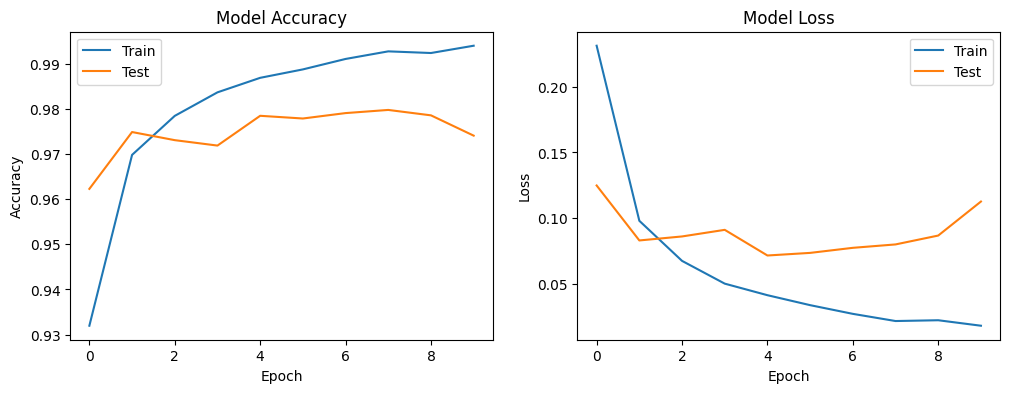

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])


plt.show()